In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py

plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

# (0,0.4453125,0.6953125)
# (0.83203125,0.3671875,0.)

In [17]:
Ro = 0.1
rand_seed_ary = np.array([1,2,3,4,5,6,7,8,9,10])

uptil_i = 5000

In [18]:
SW_zeta_skew_mat = np.empty((rand_seed_ary.size,uptil_i) )
SW_q_skew_mat = np.empty((rand_seed_ary.size,uptil_i) )
SW_KE_mat = np.empty((rand_seed_ary.size,uptil_i) )
SW_PE_mat = np.empty((rand_seed_ary.size,uptil_i) )
SW_Ens_mat = np.empty((rand_seed_ary.size,uptil_i) )
SW_qmean_mat = np.empty((rand_seed_ary.size,uptil_i) )

for ri in np.arange(rand_seed_ary.size):
    rand_seed = rand_seed_ary[ri]
    print(rand_seed)
    dgname = 'Ro_%.2f/SW_dg_%.2f_%d/SW_dg_%.2f_%d_s%i' %(Ro, Ro,rand_seed, Ro,rand_seed, 1)
    dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'
    
    with h5py.File(dgname, mode='r') as file:
        KE_data = np.squeeze(np.array(file['tasks']['KE']))
        PE_data = np.squeeze(np.array(file['tasks']['PE']))
        Ens_data = np.squeeze(np.array(file['tasks']['Ens']))
        q_mean_data = np.squeeze(np.array(file['tasks']['q_mean']))
        
        zeta_skew_data = np.squeeze(np.array(file['tasks']['zeta_skew']))
        q_skew_data = np.squeeze(np.array(file['tasks']['q_skew']))
        
        SW_zeta_skew_mat[ri,:] = zeta_skew_data[:uptil_i]
        SW_q_skew_mat[ri,:] = q_skew_data[:uptil_i]
        SW_KE_mat[ri,:] = KE_data[:uptil_i]
        SW_PE_mat[ri,:] = PE_data[:uptil_i]
        SW_Ens_mat[ri,:] = Ens_data[:uptil_i]
        SW_qmean_mat[ri,:] = q_mean_data[:uptil_i]
        
        dg_time_ary = np.array(file['scales']['sim_time'])
        # print(dg_time_ary[-10:-1])

1
2
3
4
5
6
7
8
9
10


In [19]:
P1_zeta_skew_mat = np.empty((rand_seed_ary.size,uptil_i) )
P1_q_skew_mat = np.empty((rand_seed_ary.size,uptil_i) )
P1_KE_mat = np.empty((rand_seed_ary.size,uptil_i) )
P1_PE_mat = np.empty((rand_seed_ary.size,uptil_i) )
P1_KE0_mat = np.empty((rand_seed_ary.size,uptil_i) )
P1_PE0_mat = np.empty((rand_seed_ary.size,uptil_i) )
P1_Ens_mat = np.empty((rand_seed_ary.size,uptil_i) )

for ri in np.arange(rand_seed_ary.size):
    rand_seed = rand_seed_ary[ri]
    print(rand_seed)
    dgname = 'Ro_%.2f/QGp1_dg_%.2f_%d/QGp1_dg_%.2f_%d_s%i' %(Ro, Ro,rand_seed, Ro,rand_seed, 1)
    dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'
    
    with h5py.File(dgname, mode='r') as file:
        KE_data = np.squeeze(np.array(file['tasks']['KE']))
        PE_data = np.squeeze(np.array(file['tasks']['PE']))
        KE0_data = np.squeeze(np.array(file['tasks']['KE0']))
        PE0_data = np.squeeze(np.array(file['tasks']['PE0']))
        Ens_data = np.squeeze(np.array(file['tasks']['Ens']))
        
        zeta_skew_data = np.squeeze(np.array(file['tasks']['zeta_skew']))
        q_skew_data = np.squeeze(np.array(file['tasks']['q_skew']))
        
        P1_zeta_skew_mat[ri,:] = zeta_skew_data[:uptil_i]
        P1_q_skew_mat[ri,:] = q_skew_data[:uptil_i]
        
        P1_KE_mat[ri,:] = KE_data[:uptil_i]
        P1_PE_mat[ri,:] = PE_data[:uptil_i]
        P1_KE0_mat[ri,:] = KE0_data[:uptil_i]
        P1_PE0_mat[ri,:] = PE0_data[:uptil_i]
        P1_Ens_mat[ri,:] = Ens_data[:uptil_i]
        
        dg_time_ary = np.array(file['scales']['sim_time'])
        # print(dg_time_ary[-10:-1])

1
2
3
4
5
6
7
8
9
10


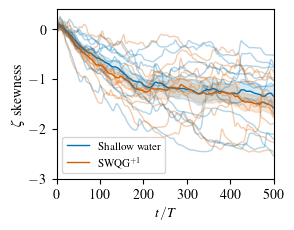

In [35]:
sw_mean = np.mean(SW_zeta_skew_mat,axis=0)
sw_std = np.std(SW_zeta_skew_mat,axis=0)/np.sqrt(10)
QG_mean = np.mean(P1_zeta_skew_mat,axis=0)
QG_std = np.std(P1_zeta_skew_mat,axis=0)/np.sqrt(10)

##############
fig=plt.figure(figsize=(2.8, 2.2))

plt.plot(dg_time_ary[:uptil_i], sw_mean, '-', color=(0,0.4453125,0.6953125), label="Shallow water")
plt.plot(dg_time_ary[:uptil_i], QG_mean, '-', color=(0.83203125,0.3671875,0.), label="SWQG$^{+1}$")

plt.fill_between(dg_time_ary[:uptil_i],sw_mean-sw_std,sw_mean+sw_std, color=(0,0.4453125,0.6953125), alpha=0.15)
plt.fill_between(dg_time_ary[:uptil_i],QG_mean-QG_std,QG_mean+QG_std, color=(0.83203125,0.3671875,0.), alpha=0.15)

for ri in np.arange(rand_seed_ary.size):
    plt.plot(dg_time_ary[:uptil_i],SW_zeta_skew_mat[ri,:], color=(0,0.4453125,0.6953125), alpha=0.3)
    plt.plot(dg_time_ary[:uptil_i],P1_zeta_skew_mat[ri,:], color=(0.83203125,0.3671875,0.), alpha=0.3)

plt.xlim([0,500]); plt.ylim([-3,0.4])
plt.xlabel("$t/T$"); plt.ylabel("$\zeta$ skewness")
plt.legend()

figname = 'figs/timeser_zetaskew'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

plt.show()

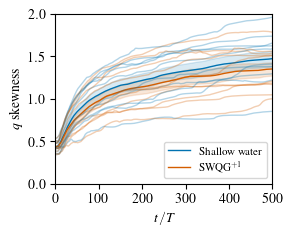

In [36]:
sw_mean = np.mean(SW_q_skew_mat,axis=0)
sw_std = np.std(SW_q_skew_mat,axis=0)*1/np.sqrt(10)
QG_mean = np.mean(P1_q_skew_mat,axis=0)
QG_std = np.std(P1_q_skew_mat,axis=0)*1/np.sqrt(10)

##############
fig=plt.figure(figsize=(2.8, 2.2))

plt.plot(dg_time_ary[:uptil_i], sw_mean, '-', color=(0,0.4453125,0.6953125), label="Shallow water")
plt.plot(dg_time_ary[:uptil_i], QG_mean, '-', color=(0.83203125,0.3671875,0.), label="SWQG$^{+1}$")

plt.fill_between(dg_time_ary[:uptil_i],sw_mean-sw_std,sw_mean+sw_std, color=(0,0.4453125,0.6953125), alpha=0.15)
plt.fill_between(dg_time_ary[:uptil_i],QG_mean-QG_std,QG_mean+QG_std, color=(0.83203125,0.3671875,0.), alpha=0.15)

for ri in np.arange(rand_seed_ary.size):
    plt.plot(dg_time_ary[:uptil_i],SW_q_skew_mat[ri,:], color=(0,0.4453125,0.6953125), alpha=0.3)
    plt.plot(dg_time_ary[:uptil_i],P1_q_skew_mat[ri,:], color=(0.83203125,0.3671875,0.), alpha=0.3)


plt.xlim([0,500]); plt.ylim([0,2])
plt.xlabel("$t/T$"); plt.ylabel("$q$ skewness")
plt.legend()

figname = 'figs/timeser_qskew'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

plt.show()

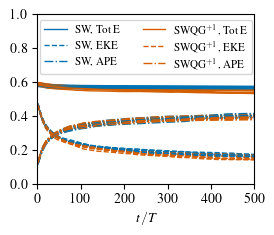

In [50]:
fig=plt.figure(figsize=(2.8, 2.2))

ri = 0
plt.plot(dg_time_ary[1:uptil_i],SW_KE_mat[ri,1:]+SW_PE_mat[ri,1:], color=(0,0.4453125,0.6953125), alpha=1, label="SW, Tot E")
plt.plot(dg_time_ary[1:uptil_i],SW_KE_mat[ri,1:], color=(0,0.4453125,0.6953125), linestyle='dashed', label="SW, EKE")
plt.plot(dg_time_ary[1:uptil_i],SW_PE_mat[ri,1:], color=(0,0.4453125,0.6953125), linestyle='-.', label="SW, APE")

plt.plot(dg_time_ary[1:uptil_i],P1_KE_mat[ri,1:]+P1_PE_mat[ri,1:], color=(0.83203125,0.3671875,0.), label="SWQG$^{+1}$, Tot E")
plt.plot(dg_time_ary[1:uptil_i],P1_KE_mat[ri,1:], color=(0.83203125,0.3671875,0.), linestyle='dashed', label="SWQG$^{+1}$, EKE")
plt.plot(dg_time_ary[1:uptil_i],P1_PE_mat[ri,1:], color=(0.83203125,0.3671875,0.), linestyle='-.', label="SWQG$^{+1}$, APE")


for ri in np.arange(1,rand_seed_ary.size):
    plt.plot(dg_time_ary[1:uptil_i],SW_KE_mat[ri,1:], color=(0,0.4453125,0.6953125), linestyle='dashed')
    plt.plot(dg_time_ary[1:uptil_i],SW_PE_mat[ri,1:], color=(0,0.4453125,0.6953125), linestyle='-.')
    plt.plot(dg_time_ary[1:uptil_i],SW_KE_mat[ri,1:]+SW_PE_mat[ri,1:], color=(0,0.4453125,0.6953125), alpha=1)

    plt.plot(dg_time_ary[1:uptil_i],P1_KE_mat[ri,1:], color=(0.83203125,0.3671875,0.), linestyle='dashed')
    plt.plot(dg_time_ary[1:uptil_i],P1_PE_mat[ri,1:], color=(0.83203125,0.3671875,0.), linestyle='-.')
    plt.plot(dg_time_ary[1:uptil_i],P1_KE_mat[ri,1:]+P1_PE_mat[ri,1:], color=(0.83203125,0.3671875,0.))

plt.xlim([0,500]); plt.ylim([0,1.0])
plt.xlabel("$t/T$"); plt.ylabel("")
plt.legend(ncol=2,loc=9)

figname = 'figs/timeser_energies'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

plt.show()

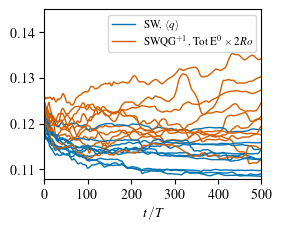

In [65]:
fig=plt.figure(figsize=(2.8, 2.2))

ri = 0;
plt.plot(dg_time_ary[1:uptil_i],SW_qmean_mat[ri,1:], color=(0,0.4453125,0.6953125), label=r"SW, $\langle q \rangle$")
plt.plot(dg_time_ary[1:uptil_i],(P1_KE0_mat[ri,1:]+P1_PE0_mat[ri,1:])*2*Ro, color=(0.83203125,0.3671875,0.), label=r"SWQG$^{+1}$, Tot E$^0\times 2 Ro$")

for ri in np.arange(1,rand_seed_ary.size):
    plt.plot(dg_time_ary[1:uptil_i],SW_qmean_mat[ri,1:], color=(0,0.4453125,0.6953125))
    plt.plot(dg_time_ary[1:uptil_i],(P1_KE0_mat[ri,1:]+P1_PE0_mat[ri,1:])*2*Ro, color=(0.83203125,0.3671875,0.))
    
plt.xlim([0,500]); plt.ylim([0.108,0.145])
plt.xlabel("$t/T$"); plt.ylabel("")
plt.legend(ncol=1)

figname = 'figs/timeser_meanq'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

plt.show()

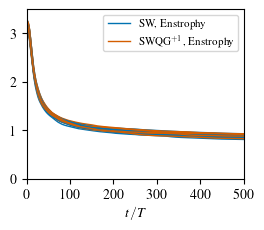

In [68]:
fig=plt.figure(figsize=(2.8, 2.2))

ri=0
plt.plot(dg_time_ary[1:uptil_i],SW_Ens_mat[ri,1:], color=(0,0.4453125,0.6953125), label=r"SW, Enstrophy")
plt.plot(dg_time_ary[1:uptil_i],P1_Ens_mat[ri,1:], color=(0.83203125,0.3671875,0.), label=r"SWQG$^{+1}$, Enstrophy")

for ri in np.arange(1,rand_seed_ary.size):

    plt.plot(dg_time_ary[1:uptil_i],SW_Ens_mat[ri,1:], color=(0,0.4453125,0.6953125))
    plt.plot(dg_time_ary[1:uptil_i],P1_Ens_mat[ri,1:], color=(0.83203125,0.3671875,0.))

plt.xlim([0,500]); plt.ylim([0,3.5])
plt.xlabel("$t/T$"); plt.ylabel("")
plt.legend(ncol=1)

figname = 'figs/timeser_enstro'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

plt.show()